In [68]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import sys
import pathlib
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler

sys.path.insert(1, './fma_metadata/')
from fma_metadata import utils

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 5)

----
# Years of Rock
### How rock changed from 2008 to 2015
------

##### 1. Loading data - preprocessing

In [69]:
# loading datasets
echonest = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')
tracks = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv')

In [70]:
rock_genre = tracks['track'][['genre_top']][tracks['track']['genre_top'] == 'Rock']
# filtered echonest_audio_features by rock genres
rock_df = echonest['echonest','audio_features'].merge(rock_genre,on='track_id')

In [71]:
rock_df.shape

(3892, 9)

In [72]:
# extract year from date_created --> to new col: year_created in track
tracks['track','year'] = pd.DatetimeIndex(tracks['track','date_created']).year
years = tracks['track'][['year']]
duration = tracks['track'][['duration']]
listens = tracks['track'][['listens']]
rock_df = rock_df.merge(years, on='track_id')
rock_df = rock_df.merge(listens, on='track_id')
rock_df = rock_df.merge(duration, on='track_id')
rock_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,year,listens,duration
track_id,,,,,,,,,,,,
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock,2008,424,405
154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632,Rock,2008,205,319
155,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325,Rock,2008,197,756
169,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347,Rock,2008,270,144
170,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548,Rock,2008,122,181


In [73]:
rock_df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [74]:
# normalized audio features
rock_df.iloc[:,0:8] = (rock_df.iloc[:,0:8]\
                                           -rock_df.iloc[:,0:8].min())\
                                          /(rock_df.iloc[:,0:8].max()\
                                            -rock_df.iloc[:,0:8].min())
rock_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,year,listens,duration
track_id,,,,,,,,,,,,
153,0.992477,0.235523,0.979996,0.979732,0.101517,0.029958,0.276730,0.020248,Rock,2008,424,405
154,0.974230,0.347646,0.023585,0.963730,0.092975,0.009158,0.111624,0.021913,Rock,2008,205,319
155,0.985801,0.104813,0.912310,0.973981,0.357482,0.068009,0.284293,0.020565,Rock,2008,197,756
169,0.993317,0.201312,0.722926,0.264895,0.070895,0.031730,0.295199,0.014398,Rock,2008,270,144
170,0.890402,0.284917,0.744434,0.927317,0.120801,0.069343,0.311301,0.061032,Rock,2008,122,181


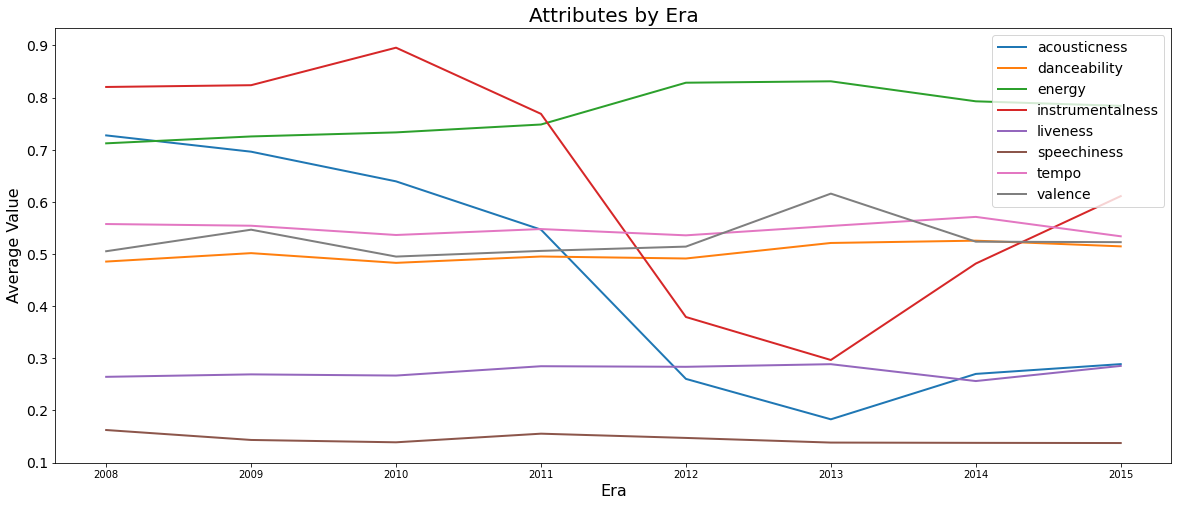

In [75]:
plt.figure(figsize=(20, 8))
attributes = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence']
for attribute in attributes:
    x = rock_df.groupby("year")[attribute].mean()
    ax= sns.lineplot(x=x.index,y=x,label=attribute,linewidth = 2, seed=4)

ax.set_title('Attributes by Era', fontsize=20);
ax.set_ylabel('Average Value', fontsize=16);
ax.set_xlabel('Era', fontsize=16);
ax.legend(prop=dict(size=14));
#ax.set_xticklabels(fontsize=14, labels=['50s/60s', '70s/80s', '90s/2000s']);
ax.set_yticklabels(fontsize=14, labels=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]);

#### Number of songs per year

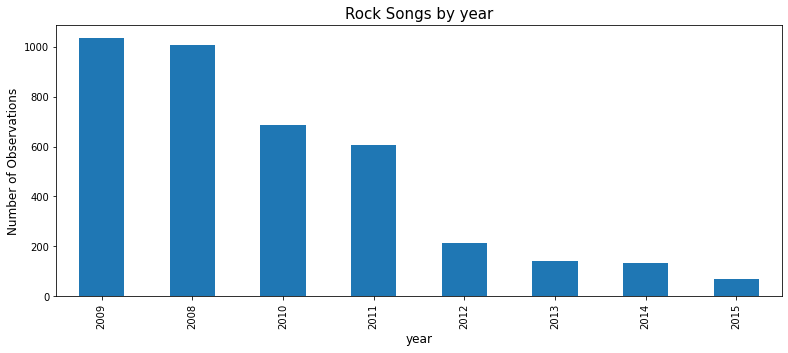

In [76]:
chart =rock_df['year'].value_counts().plot(kind='bar');
chart.set_title('Rock Songs by year', fontsize=15);
chart.set_ylabel('Number of Observations', fontsize=12);
chart.set_xlabel('year', fontsize=12);

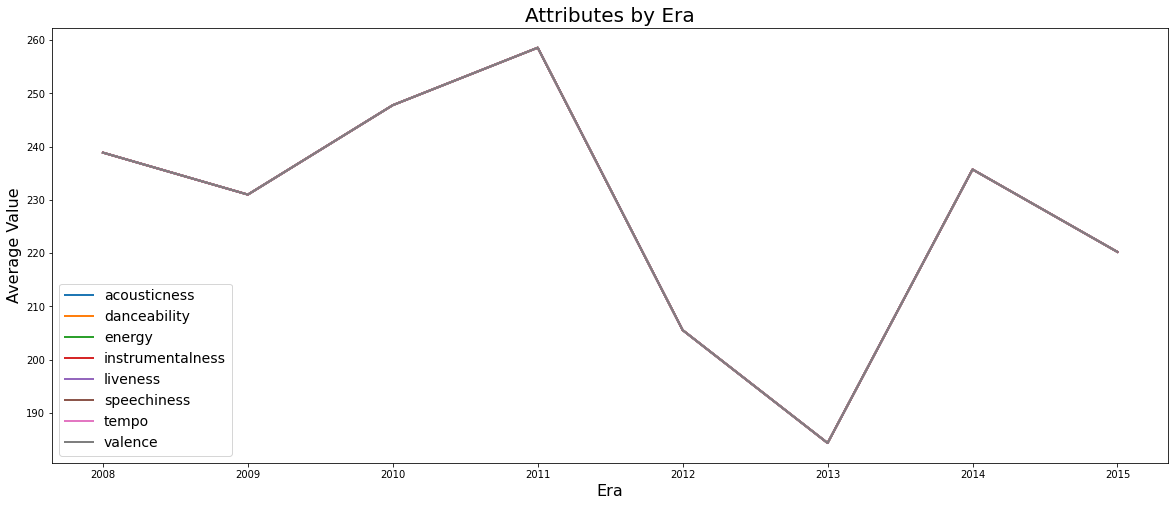

In [78]:
plt.figure(figsize=(20, 8))
for attribute in attributes:
    x = rock_df.groupby("year")['duration'].mean()
    ax= sns.lineplot(x=x.index,y=x,label=attribute,linewidth = 2, seed=4)

ax.set_title('Attributes by Era', fontsize=20);
ax.set_ylabel('Average Value', fontsize=16);
ax.set_xlabel('Era', fontsize=16);
ax.legend(prop=dict(size=14));
#ax.set_xticklabels(fontsize=14, labels=['50s/60s', '70s/80s', '90s/2000s']);
#ax.set_yticklabels(fontsize=14, labels=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]);

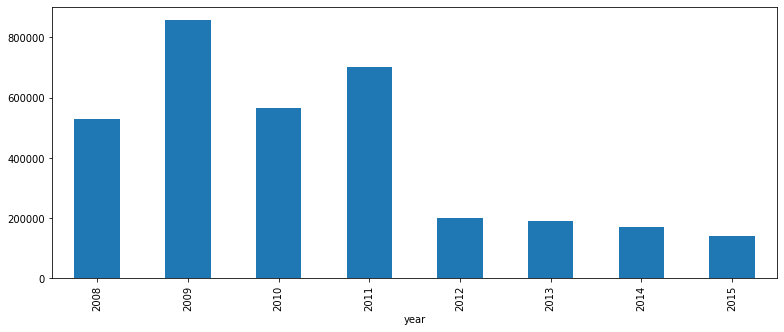

In [79]:
# listens of Rock across the years
x = rock_df.groupby("year")['listens'].sum()
char = x.plot(kind='bar')